# **Football Teams Rating**

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Reading the Data

In [2]:
df = pd.read_csv('/content/Football teams.csv')
df

,Team,Tournament,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating
0,Manchester City,Premier League,83,15.8,46,2,60.8,89.4,12.8,7.01
1,Bayern Munich,Bundesliga,99,17.1,44,3,58.1,85.5,12.9,6.95
2,Paris Saint-Germain,Ligue 1,86,15.0,73,7,60.1,89.5,9.5,6.88
3,Barcelona,LaLiga,85,15.3,68,2,62.4,89.7,10.6,6.87
4,Real Madrid,LaLiga,67,14.4,57,2,57.7,87.7,11.8,6.86
...,...,...,...,...,...,...,...,...,...,...
93,Sheffield United,Premier League,20,8.5,73,3,43.0,76.9,19.1,6.46
94,Crotone,Serie A,45,9.5,85,4,47.2,80.4,12.7,6.43
95,Benevento,Serie A,40,11.0,90,5,44.2,77.7,13.4,6.43
96,Dijon,Ligue 1,25,9.2,75,5,46.9,80.0,14.3,6.42


# Understanding the Data

In [3]:
df.dtypes

Team             object
Tournament       object
Goals             int64
Shots pg        float64
yellow_cards      int64
red_cards         int64
Possession%     float64
Pass%           float64
AerialsWon      float64
Rating          float64
dtype: object

In [4]:
df.shape

(98, 10)

In [6]:
df.size

980

In [7]:
df.columns

Index(['Team', 'Tournament', 'Goals', 'Shots pg', 'yellow_cards', 'red_cards',
       'Possession%', 'Pass%', 'AerialsWon', 'Rating'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          98 non-null     object 
 1   Tournament    98 non-null     object 
 2   Goals         98 non-null     int64  
 3   Shots pg      98 non-null     float64
 4   yellow_cards  98 non-null     int64  
 5   red_cards     98 non-null     int64  
 6   Possession%   98 non-null     float64
 7   Pass%         98 non-null     float64
 8   AerialsWon    98 non-null     float64
 9   Rating        98 non-null     float64
dtypes: float64(5), int64(3), object(2)
memory usage: 7.8+ KB


In [9]:
df.describe()

,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,52.183673,11.851020,69.704082,3.336735,49.995918,80.441837,16.006122,6.646122
std,16.445691,2.149718,15.137316,2.148814,4.890068,4.690172,3.078955,0.132148
min,20.000000,7.100000,40.000000,0.000000,38.500000,66.500000,9.500000,6.410000
25%,40.250000,10.325000,60.000000,2.000000,46.225000,78.025000,14.025000,6.540000
50%,50.000000,11.450000,67.500000,3.000000,49.750000,80.800000,16.100000,6.630000
75%,61.750000,13.350000,80.000000,4.750000,52.850000,83.450000,17.850000,6.730000
max,99.000000,17.100000,117.000000,10.000000,62.400000,89.700000,26.800000,7.010000


In [10]:
df.corr()

,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating
Goals,1.000000,0.829698,-0.189157,-0.001185,0.717834,0.694214,-0.495579,0.852152
Shots pg,0.829698,1.000000,-0.369343,-0.105080,0.759153,0.684035,-0.382147,0.851265
yellow_cards,-0.189157,-0.369343,1.000000,0.368847,-0.164302,-0.184238,0.060116,-0.417049
red_cards,-0.001185,-0.105080,0.368847,1.000000,-0.083360,-0.043761,-0.031791,-0.162358
Possession%,0.717834,0.759153,-0.164302,-0.083360,1.000000,0.851458,-0.543970,0.734978
Pass%,0.694214,0.684035,-0.184238,-0.043761,0.851458,1.000000,-0.764788,0.668573
AerialsWon,-0.495579,-0.382147,0.060116,-0.031791,-0.543970,-0.764788,1.000000,-0.327225
Rating,0.852152,0.851265,-0.417049,-0.162358,0.734978,0.668573,-0.327225,1.000000


In [11]:
df.nunique()

Team            98
Tournament       5
Goals           49
Shots pg        61
yellow_cards    53
red_cards       11
Possession%     80
Pass%           75
AerialsWon      62
Rating          43
dtype: int64

In [13]:
df.isnull().sum()

Team            0
Tournament      0
Goals           0
Shots pg        0
yellow_cards    0
red_cards       0
Possession%     0
Pass%           0
AerialsWon      0
Rating          0
dtype: int64

# Exploratory Data Analysis

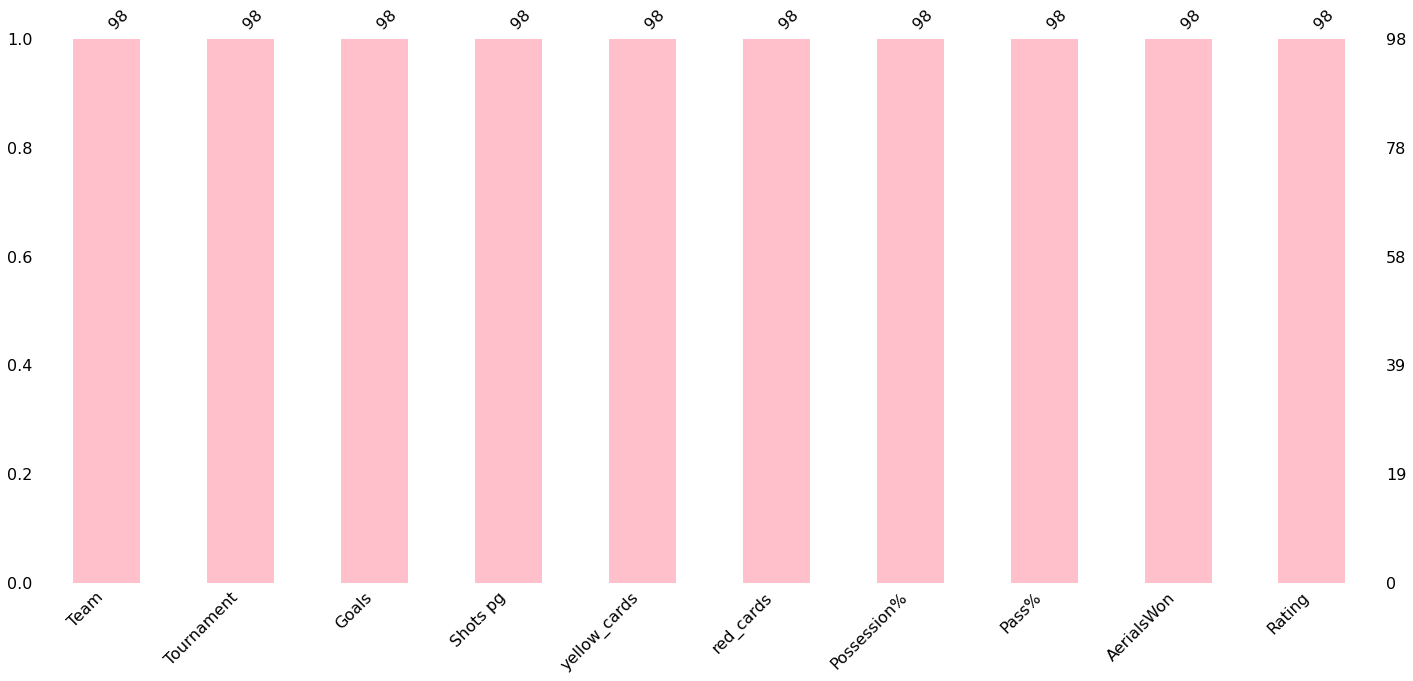

In [14]:
import missingno as no
no.bar(df, color='pink')

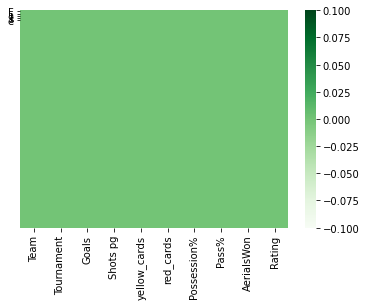

In [15]:
sns.heatmap(df.isnull(), yticklabels='False', cmap='Greens')

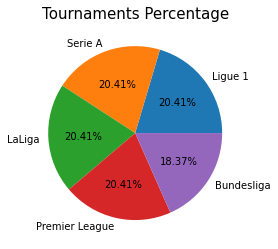

In [17]:
df1 = df['Tournament'].value_counts()
plt.pie(df1.values, labels=df1.index, autopct='%0.2f%%')
plt.title('Tournaments Percentage', fontsize=15)
plt.show()

Text(0.5, 1.0, 'Top 10 Goal Scoring Teams')

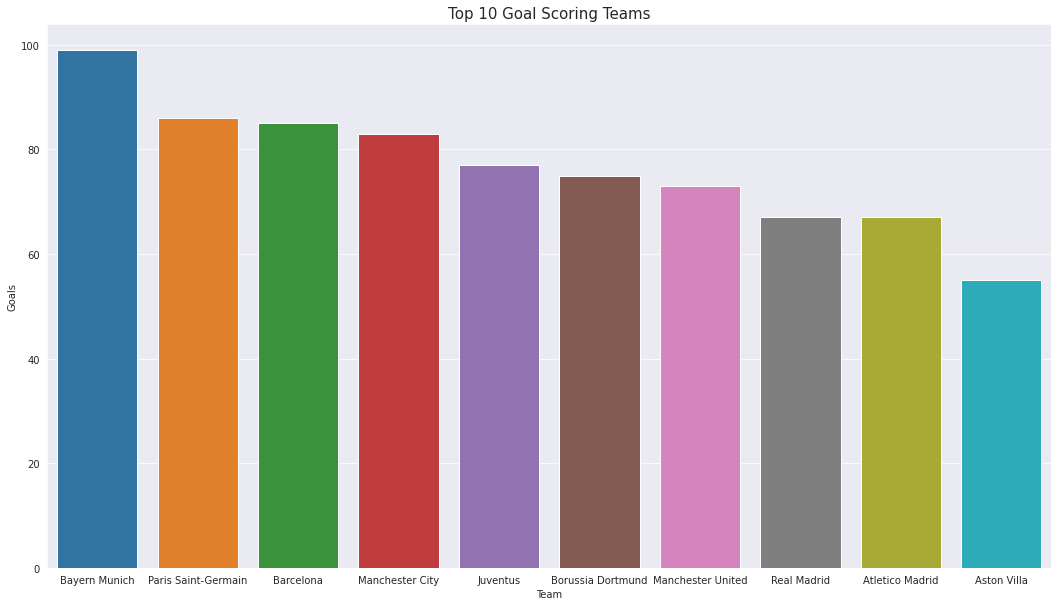

In [37]:
sns.set_style('darkgrid')
plt.figure(figsize=(18,10))
sns.barplot(x='Team',y='Goals', data=df[:10].sort_values(by='Goals',ascending=False))
plt.title('Top 10 Goal Scoring Teams', fontsize=15)

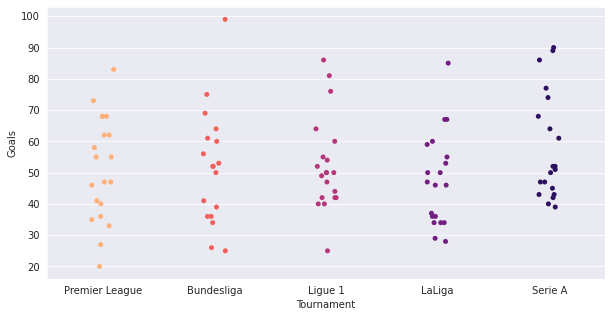

In [38]:
plt.figure(figsize=(10,5))
sns.stripplot(x=df.Tournament, y=df.Goals, palette='magma_r')
plt.show()

Text(0.5, 1.0, 'Goals in Tournament')

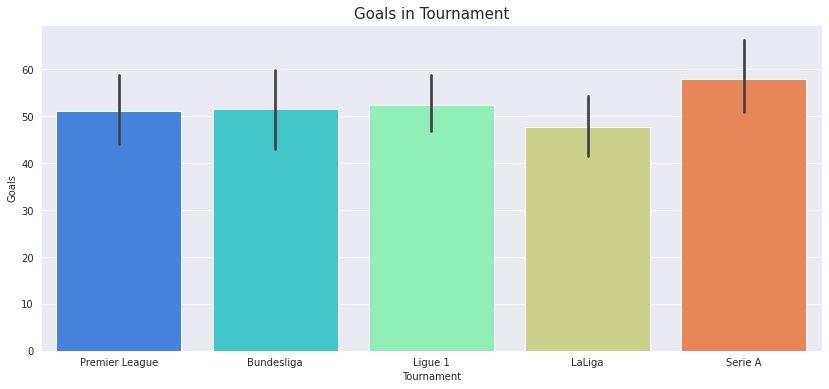

In [41]:
plt.figure(figsize=(14,6))
sns.barplot(x=df.Tournament, y=df.Goals, palette='rainbow')
plt.title('Goals in Tournament', fontsize=15)

Text(0.5, 1.0, 'Top Possession Teams are')

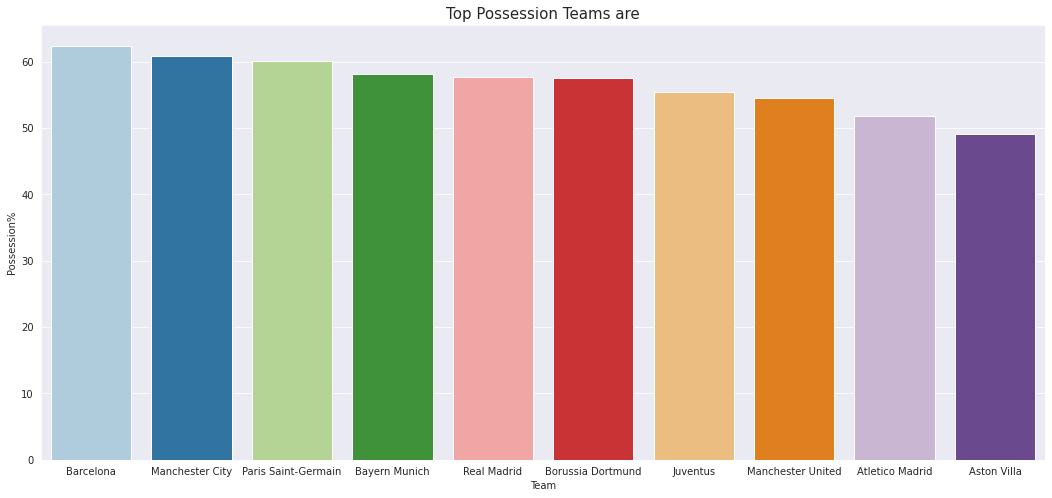

In [57]:
plt.figure(figsize=(18,8))
sns.barplot(x='Team',y='Possession%',data=df[:10].sort_values(by='Possession%',ascending=False),palette='Paired')
plt.title("Top Possession Teams are", fontsize=15)

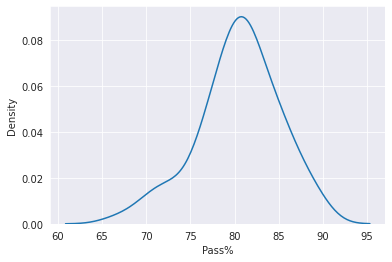

In [58]:
sns.kdeplot(x='Pass%',data=df)

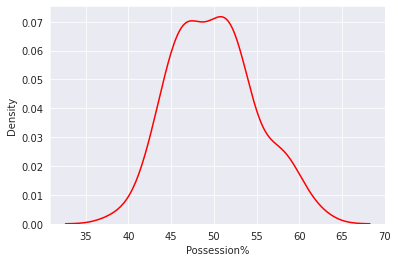

In [62]:
sns.kdeplot(x='Possession%',data=df, color='r')

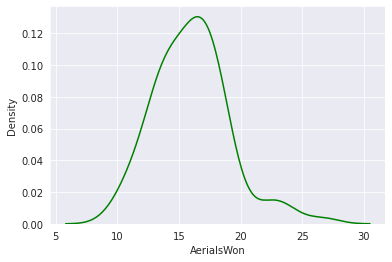

In [66]:
sns.kdeplot(x='AerialsWon',data=df, color='g')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


<Figure size 1152x720 with 0 Axes>

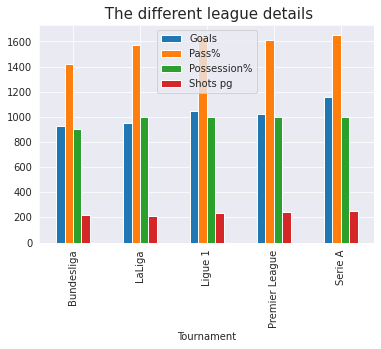

In [61]:
plt.figure(figsize=(16,10))
tournaments = df.groupby('Tournament')['Goals','Pass%','Possession%','Shots pg'].sum().plot(kind='bar')
plt.title(" The different league details", fontsize=15)
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


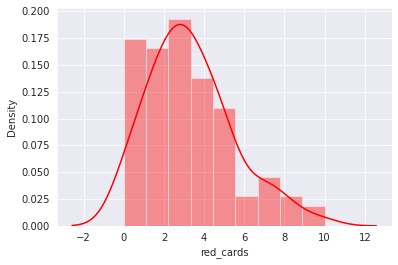

In [63]:
sns.distplot(df['red_cards'], color='red')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


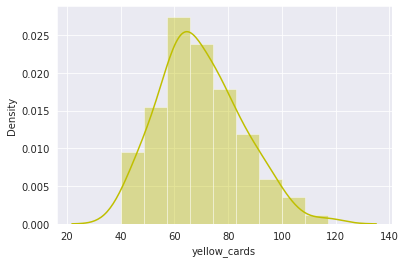

In [64]:
sns.distplot(df['yellow_cards'], color='y')

Text(0.5, 1.0, 'Top 10 Teams Rating')

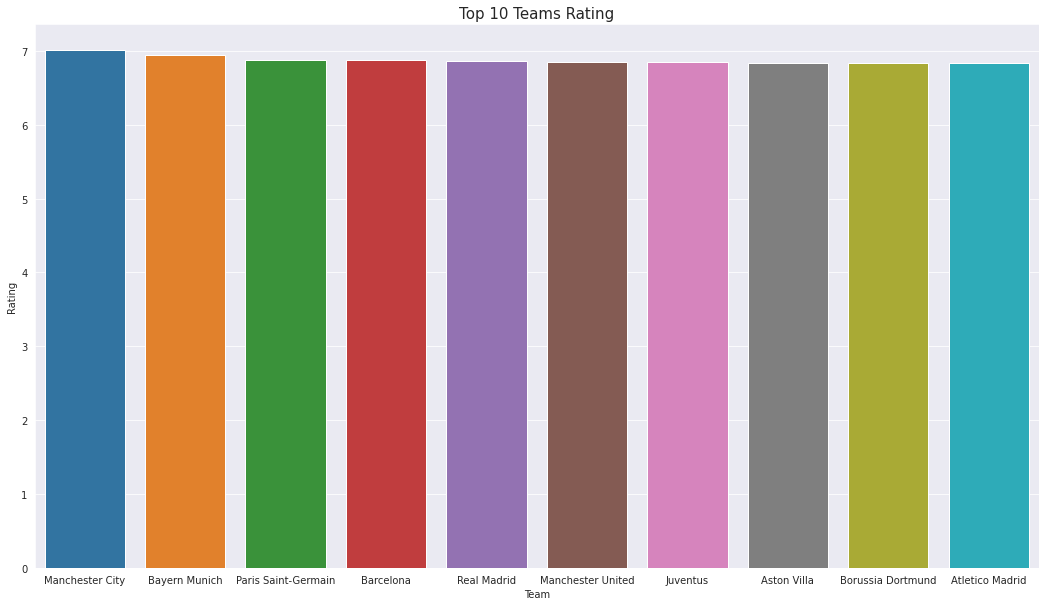

In [69]:
sns.set_style('darkgrid')
plt.figure(figsize=(18,10))
sns.barplot(x='Team',y='Rating', data=df[:10].sort_values(by='Rating',ascending=False))
plt.title('Top 10 Teams Rating', fontsize=15)

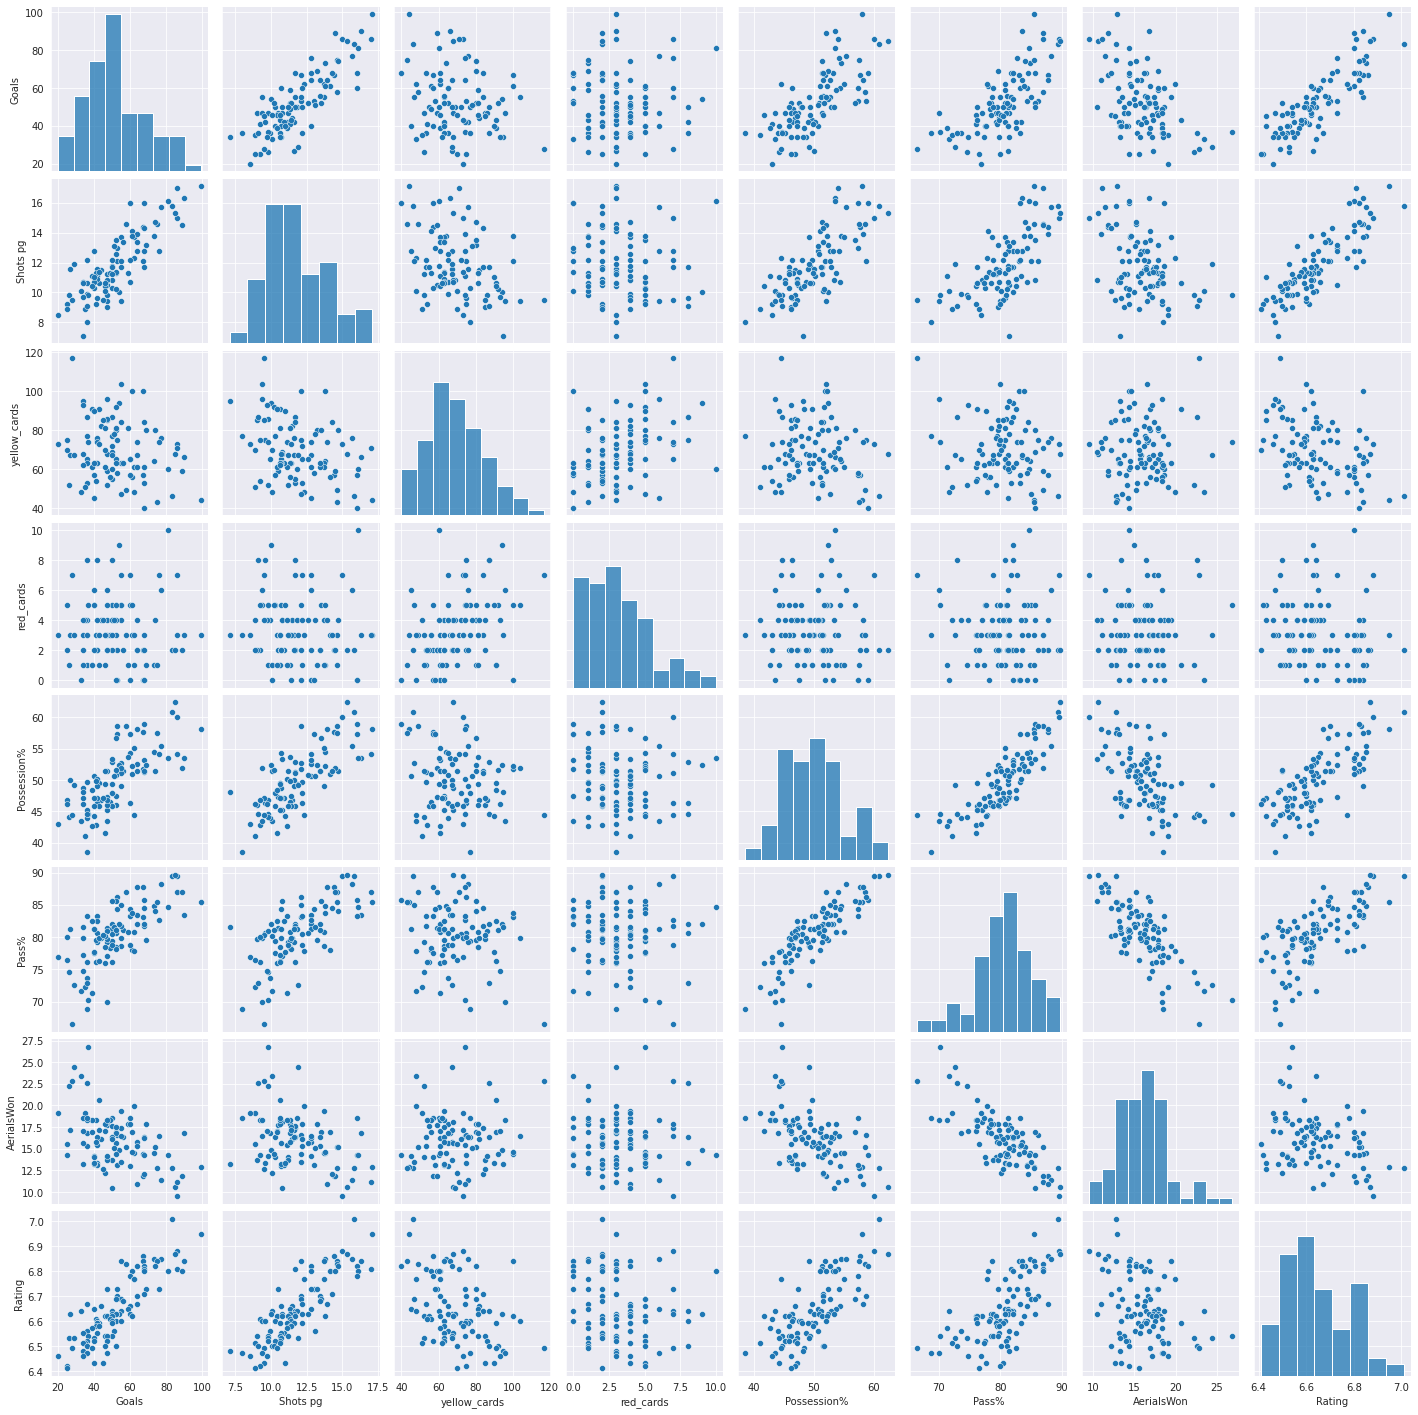

In [70]:
sns.pairplot(df)

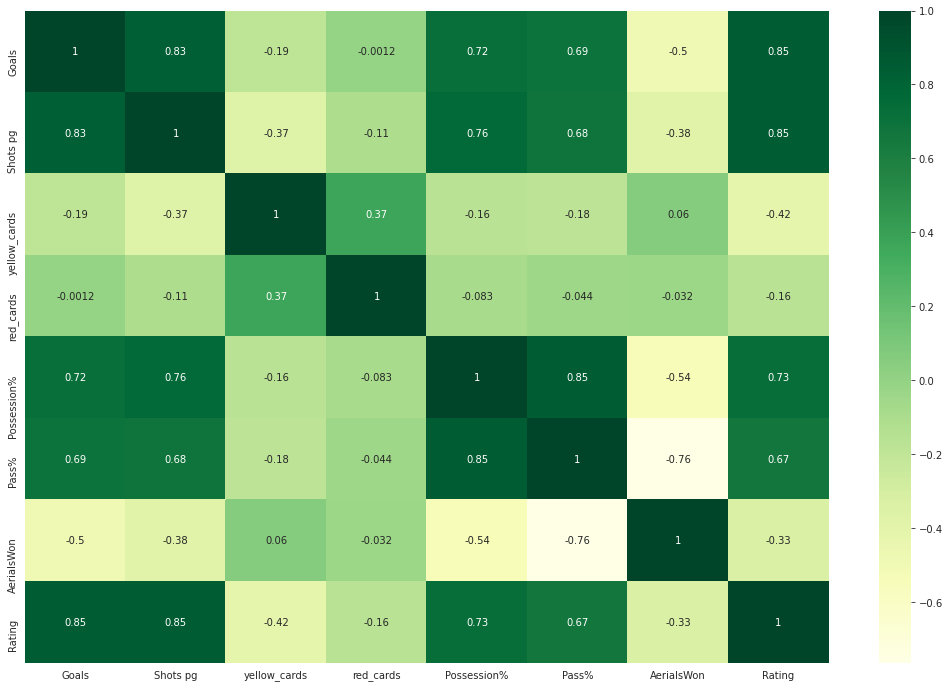

In [73]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), yticklabels='auto', annot=True, cmap='YlGn')
plt.show()

# Splitting the Data into Dependent and Independent Variables

In [74]:
x = df.drop(['Team', 'Tournament' ,'Rating'], axis=1)
y = df["Rating"]

# Feature Importance

In [87]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)
print(model.feature_importances_)

[0.38869074 0.30502267 0.05694046 0.03126293 0.0967788  0.09021349
 0.0310909 ]


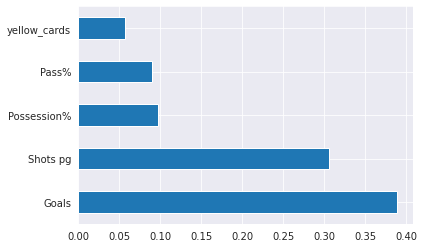

In [89]:
feat_imp = pd.Series(model.feature_importances_, index=x.columns)
feat_imp.nlargest(5).plot(kind='barh')

# Training and Testing the Data

In [120]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=10)

# Linear Regression

In [121]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Prediction

In [122]:
ypred_train = lr.predict(xtrain)
ypred_test = lr.predict(xtest)

## Accuracy

In [123]:
from sklearn import metrics
print("Accuracy of training data:", metrics.r2_score(ytrain, ypred_train)*100)
ac1 = metrics.r2_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac1)

Accuracy of training data: 85.93715635518097
Accuracy of testing data: 85.50910152456676


## Error

In [124]:
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, ypred_test))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, ypred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, ypred_test)))

Mean Absolute Error: 0.04347097831344238
Mean Squared Error: 0.0025545642649879422
Root Mean Squared Error: 0.05054269744471443


# KNN

In [141]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(xtrain, ytrain)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

## Prediction

In [142]:
ypred_train = knn.predict(xtrain)
ypred_test = knn.predict(xtest)

## Accuracy

In [143]:
from sklearn import metrics
print("Accuracy of training data:", metrics.r2_score(ytrain, ypred_train)*100)
ac2 = metrics.r2_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac2)

Accuracy of training data: 84.2542613795557
Accuracy of testing data: 89.04882333939983


## Error

In [144]:
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, ypred_test))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, ypred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, ypred_test)))

Mean Absolute Error: 0.036833333333333315
Mean Squared Error: 0.001930555555555554
Root Mean Squared Error: 0.04393808775488021


# Random Forest Regressor

In [273]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=3, n_jobs=1)
rf.fit(xtrain, ytrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

## Prediction

In [274]:
ypred_train = rf.predict(xtrain)
ypred_test = rf.predict(xtest)

## Accuracy

In [275]:
from sklearn import metrics
print("Accuracy of training data:", metrics.r2_score(ytrain, ypred_train)*100)
ac3 = metrics.r2_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac3)

Accuracy of training data: 90.01102458451159
Accuracy of testing data: 80.80577386297048


## Error

In [276]:
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, ypred_test))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, ypred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, ypred_test)))

Mean Absolute Error: 0.04735366841793951
Mean Squared Error: 0.003383702140131596
Root Mean Squared Error: 0.058169598074351486


# Comparing Accuracy

In [277]:
accuracy =  {ac1: 'Logistic Regression', ac2: 'KNN', ac3:'Random Forest'}

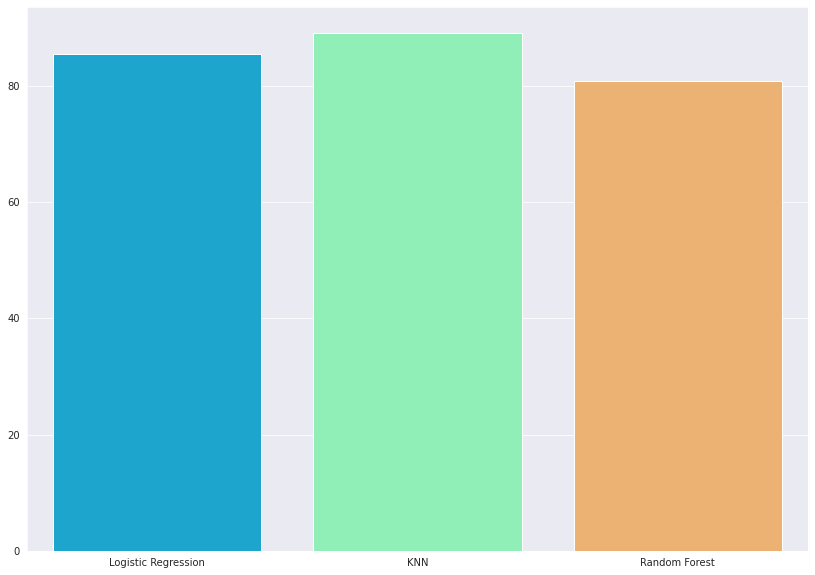

In [278]:
sns.set_style('darkgrid')
plt.figure(figsize=(14, 10))
model_accuracies = list(accuracy.values())
model_names = list(accuracy.keys())
sns.barplot(x=model_accuracies, y=model_names, palette='rainbow')

As accuracy of **KNN Regressor** algorithm is more ie. **89.04%**

Hence we will save the model.

# Saving the Model

In [279]:
import pickle
pickle.dump(knn, open('model.pkl', 'wb'))

# Sample Prediction

In [290]:
p = model.predict([[67,	14.4,	57,	2,	57.7,	87.7,	11.8]])
print("Rating = ", round(float(p),2))

Rating =  6.86
